In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from keras.models import load_model

In [2]:
# check tf version
tf.__version__

'2.15.0'

In [3]:
dir_file = "./data/bieber.txt"
words = []
with open(dir_file) as file:
  words.append(file.read())

# lower the sentence and split
words = words[0].lower().split("\n")
print(words)

['what do you mean?', 'oh, oh, oh', 'when you sometimes say yes', 'but you sometimes say no', 'what do you mean?', 'hey, yeah', "when you don't want me to move", 'but you tell me to go', 'what do you mean?', 'oh', 'what do you mean?', "said you're running out of time", 'what do you mean?', 'oh, oh, oh', 'what do you mean?', 'better make up your mind', "what do you mean? you're so indecisive, what i'm saying", 'trying to catch the beat, make up your heart', "don't know if you're happy or complaining", "don't want for us to end", 'where do i start?', 'first you wanna go to the left and you want to turn right (ooh)', "wanna argue all day, hangin' out all night (oh)", "first you're up, then you're down and in between", 'oh, i really want to know what do you mean?', 'oh, oh, oh', 'when you sometimes say yes', 'but you sometimes say no', 'what do you mean?', 'hey, yeah', "when you don't want me to move", 'but you tell me to go', 'what do you mean?', 'oh, what do you mean?', "said you're runn

In [4]:
# check the length:
print(len(words))

3715


In [5]:
# print top 5 lyrics
for i in range(5):
  print(words[i])

what do you mean?
oh, oh, oh
when you sometimes say yes
but you sometimes say no
what do you mean?


In [6]:
# tokenize
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(words)

In [7]:
# word_index
total_words = len(tokenizer.word_index) + 1

In [8]:
# texts to sequences
print(words[0])
print(f'text to sequences results : {tokenizer.texts_to_sequences([words[0]])}')

what do you mean?
text to sequences results : [[31, 27, 2, 91]]


In [9]:
words[0]

'what do you mean?'

In [10]:
def n_gram(sentences, tokenizer):
  n_gram = []
  total_n_gram = []
  for word in sentences:
    token_list = tokenizer.texts_to_sequences([word])[0]
    for token in range(1,len(token_list)):
      n_gram = token_list[:token + 1]
      total_n_gram.append(n_gram)
  return total_n_gram

In [11]:
# check n_gram_results
n_grams = n_gram([words[2]], tokenizer)
iter = 1
for i in n_grams:
  print(f'iteration {iter} results : {i}')
  iter +=1

# all_words n_gram
n_grams = n_gram(words, tokenizer)

iteration 1 results : [46, 2]
iteration 2 results : [46, 2, 165]
iteration 3 results : [46, 2, 165, 56]
iteration 4 results : [46, 2, 165, 56, 355]


In [12]:
# pad_sewuences
def pad_sequences_token(n_grams):
  max = 0
  for x in n_grams:
    if max < len(x):
       max = len(x)
  padded = pad_sequences(n_grams, maxlen = max)
  return padded, max

train_padded, max = pad_sequences_token(n_grams)
train_padded

array([[  0,   0,   0, ...,   0,  31,  27],
       [  0,   0,   0, ...,  31,  27,   2],
       [  0,   0,   0, ...,  27,   2,  91],
       ...,
       [  0,   0,   0, ...,   6, 309,   5],
       [  0,   0,   0, ..., 309,   5, 372],
       [  0,   0,   0, ...,   0,   7,   7]])

In [13]:
def get_feature_labels(n_grams, total_words):
  features = n_grams[:, :-1]
  labels = n_grams[:,-1]
  one_hot_encoded_label = to_categorical(labels, num_classes=total_words)
  return features, one_hot_encoded_label

# created features and labels data
features_train, labels_train = get_feature_labels(train_padded, total_words)
print(features_train)
print("===========================")
print(labels_train)

[[  0   0   0 ...   0   0  31]
 [  0   0   0 ...   0  31  27]
 [  0   0   0 ...  31  27   2]
 ...
 [  0   0   0 ...   2   6 309]
 [  0   0   0 ...   6 309   5]
 [  0   0   0 ...   0   0   7]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
def create_model(total_words, max_sequence_len):

    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150)))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# create the model
model = create_model(total_words, max)

# Train the model
history = model.fit(features_train, labels_train, epochs=50, verbose=1)


Epoch 1/50


807/807 [==============================] - 18s 18ms/step - loss: 5.6597 - accuracy: 0.0652
Epoch 2/50
807/807 [==============================] - 17s 21ms/step - loss: 4.7042 - accuracy: 0.1454
Epoch 3/50
807/807 [==============================] - 17s 21ms/step - loss: 3.9916 - accuracy: 0.2388
Epoch 4/50
807/807 [==============================] - 18s 23ms/step - loss: 3.4398 - accuracy: 0.3216
Epoch 5/50
807/807 [==============================] - 18s 23ms/step - loss: 3.0068 - accuracy: 0.3896
Epoch 6/50
807/807 [==============================] - 19s 23ms/step - loss: 2.6497 - accuracy: 0.4498
Epoch 7/50
807/807 [==============================] - 19s 23ms/step - loss: 2.3501 - accuracy: 0.5028
Epoch 8/50
807/807 [==============================] - 20s 24ms/step - loss: 2.0949 - accuracy: 0.5501
Epoch 9/50
807/807 [==============================] - 17s 22ms/step - loss: 1.8736 - accuracy: 0.5926
Epoch 10/50
807/807 [==============================] - 18s 22ms/step - loss: 1.

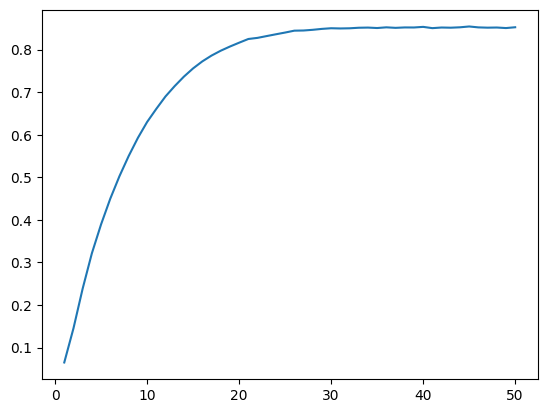

In [15]:
plt.plot([x for x in range(1, 51)], history.history['accuracy'])

In [23]:
def predict_next_word(model, sentences, tokenizer, max_sentence_length, num_next_words):
  sentence_temp  =  sentences
  for _ in range(num_next_words):
    words = tokenizer.texts_to_sequences([sentence_temp])[0]
    words_padded = pad_sequences([words], maxlen = max_sentence_length - 1, padding='pre')
    pred = model.predict(words_padded, verbose = 0)
    pred = np.argmax(pred, axis=-1).item()
    output_word = tokenizer.index_word[pred]
    sentence_temp += " " + output_word
  return sentence_temp


next_word = predict_next_word(model, "what do", tokenizer, max_sentence_length = max, num_next_words = 10)
print(next_word)

what do you mean you're overprotective when i'm leaving back back down


In [24]:
# save the model
model.save("music_generate.h5")

c:\Users\Teddy Dharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
